In [1]:
import Levenshtein

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

class NameMatchScorer:
    """Interface for scoring putative name matches"""
    def __init__(self, name1, name2, threshold=0.5, ngram_range=(1,4)):
        self.name1 = name1
        self.name2 = name2
        self.threshold = threshold
        self.ngram_range = ngram_range
    def __str__(self):
    # TODO - fill in (see our work from corpora.py for an example)
        return f"Cleaned Names:\n{self.name1}\nError Names:\n{self.name2}"
    def __repr__(self):
    # TODO - fill in (see our work from corpora.py for an example)
        return f"NameDataFrame(cleaned_names={self.name1}, error_names={self.name2})"
    def score(self, name1, name2):        
        pass

class ExactMatchScoring(NameMatchScorer):
    def score(self):
        if self.name1==self.name2:
            pred = True
        else:
            pred = False
        
        if self.name1==self.name2:
            similarity = 1
        else:
            similarity = 0
        # pred = [x == y for x, y in zip(self.name1, self.name2)]
        return pred, similarity
    
class Jaccard(NameMatchScorer):
    def score(self):
        similarity = len(set(self.name1) & set(self.name2)) / len(set(self.name1) | set(self.name2))
        if similarity >= self.threshold:
            pred = True
        else:
            pred = False
        return pred, similarity

class Leven(NameMatchScorer):
    def score(self):
        distance = Levenshtein.distance(self.name1,self.name2)
        similarity = 1 - (distance / max(len(self.name1), len(self.name2)))
        if similarity >= self.threshold:
            pred = True
        else:
            pred=False
        return pred, similarity


class tfidf(NameMatchScorer):
    def score(self):
        corpus = [self.name1,self.name2]
        if all(x > 0 for x in self.ngram_range):
            pass
        else:
            raise ValueError("Ngrams must be greater than 0")
        vectorizer = TfidfVectorizer(analyzer='char', ngram_range=self.ngram_range)
        tfidf_matrix = vectorizer.fit_transform(corpus)
        similarity = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]
        
        if similarity >= self.threshold:
            pred = True
        else:
            pred = False
        return pred, similarity


import spacy
class Bonus(NameMatchScorer):
    def score(self):

        # Load the spaCy model
        nlp = spacy.load("en_core_web_sm")

        # Example strings
        string1 = self.name1
        string2 = self.name2

        doc1 = nlp(string1)
        doc2 = nlp(string2)

        vec1 = doc1.vector
        vec2 = doc2.vector

        # Calculate cosine similarity manually
        def cosine_similarity(vec1, vec2):
            dot_product = sum(a * b for a, b in zip(vec1, vec2))
            magnitude1 = sum(a ** 2 for a in vec1) ** 0.5
            magnitude2 = sum(b ** 2 for b in vec2) ** 0.5
            similarity = dot_product / (magnitude1 * magnitude2)
            return similarity

        similarity = cosine_similarity(vec1, vec2)

        if similarity >= self.threshold:
            pred = True
        else:
            pred = False
        
        return pred, similarity


    


In [ ]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Example strings
string1 = "John Doe"
string2 = "Jaeho Doeng"

# Process the strings
doc1 = nlp(string1)
doc2 = nlp(string2)

# Calculate document vectors
vec1 = doc1.vector
vec2 = doc2.vector

# Calculate cosine similarity manually
def cosine_similarity(vec1, vec2):
    dot_product = sum(a * b for a, b in zip(vec1, vec2))
    magnitude1 = sum(a ** 2 for a in vec1) ** 0.5
    magnitude2 = sum(b ** 2 for b in vec2) ** 0.5
    similarity = dot_product / (magnitude1 * magnitude2)
    return similarity

similarity_score = cosine_similarity(vec1, vec2)
print("Similarity score:", similarity_score)


In [2]:

def score(name1,name2,ngram_range=(1,4),threshold=0.5):
    corpus = [name1,name2]
    if all(x > 0 for x in ngram_range):
        pass
    else:
        raise ValueError("Ngrams must be greater than 0")
    vectorizer = TfidfVectorizer(analyzer='char', ngram_range=ngram_range)
    tfidf_matrix = vectorizer.fit_transform(corpus)
    similarity = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]
    
    if similarity >= threshold:
        pred = True
    else:
        pred=False
    return pred


In [3]:
class tfidf(NameMatchScorer):
    def score(self):
        person = []
        alias = []
        
        if all(x > 0 for x in self.ngram_range):
            pass
        else:
            raise ValueError("Ngrams must be greater than 0")
        vectorizer = TfidfVectorizer(analyzer='char', ngram_range=self.ngram_range)
        tfidf_matrix = vectorizer.fit_transform(corpus)
        similarity = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]
        
        if similarity >= self.threshold:
            pred = True
        else:
            pred = False
        return pred, similarity

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
import pandas as pd

data = pd.read_csv('../data/names.tsv',delimiter='\t')

# Create a corpus with all alias names
names = data.personLabel
alias = data.aliasLabel

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
import pandas as pd
from scipy import sparse

train_df = pd.read_csv('../data/names-train.tsv',delimiter='\t')

# Create a corpus with all alias names
names = train_df.personLabel.tolist()
alias = train_df.aliasLabel.tolist()

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1,4))

# Apply TF-IDF vectorization to the corpus
tfidf_matrix = vectorizer.fit_transform(alias)

tfidf_matrix_sparse = sparse.csr_matrix(tfidf_matrix)

nn_model = NearestNeighbors(n_neighbors=4, metric='cosine')

nn_model.fit(tfidf_matrix_sparse)

NearestNeighbors(metric='cosine', n_neighbors=4)

In [6]:
from statistics import mode
test_df = pd.read_csv('../data/names-test.tsv',delimiter='\t')

# Create a corpus with all alias names
names_test = test_df.personLabel.tolist()
alias_test = test_df.aliasLabel.tolist()
predictions = []

for i in alias_test:
    query_vector = vectorizer.transform([i]).toarray()
    distances, indices = nn_model.kneighbors(query_vector)
    result = mode([names[i] for i in indices[0]])
    predictions.append(result)
    
results = [x == y for x, y in zip(predictions, names_test)]
test_df['Predictions'] = results
test_df.to_csv('../data/output_tfidf.tsv',sep='\t',index=False,header=False)

In [7]:
test_df

,personLabel,aliasLabel,Predictions
0,George Washington,American Fabius,True
1,Barack Obama,President Barack Obama,True
2,Barack Obama,BHO,False
3,Barack Obama,Barack H. Obama,True
4,Mustafa Kemal Atatürk,Mustafa Kemal Paşa,True
...,...,...,...
11085,Gumersindo de Azcárate,Gumersindo José de Azcárate Menéndez,True
11086,Joan Rebull Torroja,Joan Rebull i Torroja,True
11087,Henry M. Teller,Henry Teller,True
11088,Thomas Starr King,Starr King,True


In [8]:
Counter(results)
evaluate(results,'recall')

NameError: name 'Counter' is not defined

In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate(pred,type):
    actual = [True] * len(pred)
    if type == 'precision':
        precision = precision_score(actual, pred)
        return precision
    elif type == 'recall':
        recall = recall_score(actual, pred)
        return recall
    elif type == 'f1':
        f1 = f1_score(actual,pred)
        return f1
    else:
        print("Insert from following choices['precision', 'recall', 'f1']")        


In [10]:
import abc
import csv
import collections.abc
import dataclasses
from matcher.name_matcher import NameMatchScorer
from matcher.eval.eval import evaluate
from matcher.name_matcher import Jaccard
from matcher.name_matcher import Exact
from matcher.name_matcher import Leven


@dataclasses.dataclass
class Comparison:
    """Class representing two names and their similarity"""
    name1: str
    name2: str
    score: float = 0.0

class DocIterator(abc.ABC, collections.abc.Iterator):
    def __str__(self):
        return self.__class__.__name__

class TsvIterator(DocIterator):
    """Iterator to iterate over tsv-formatted documents"""
    def __init__(self, input_path, output_path, method, threshold):
        self.output_path = output_path
        self.input_path = input_path
        self.method = method
        self.threshold = threshold

        self.fp = open(self.input_path,encoding='utf-8')
        self.reader = csv.reader(self.fp, delimiter='\t')
        next(self.reader) # skip first row
        self.output_file = open(self.output_path, 'w', newline='',encoding='utf-8')

    def __iter__(self):
        return self
    
    def __next__(self):
        try:
            row = next(self.reader)
            comparison = eval(f"Comparison(row[0], row[1], {self.method}(row[0], row[1], {self.threshold}).score())")
            # comparison = Comparison(row[0], row[1], Jaccard(row[0], row[1], 0.5).score())
            self.write_comparison_to_output(comparison)
            # return Comparison(row[0], row[1], NameMatchScorer(row[0], row[1]))
            return comparison
        except StopIteration:
            self.fp.close()
            self.output_file.close()
            raise StopIteration
    # def write_comparison_to_output(self, comparison):
    #     with open(self.output_path, 'a', newline='') as output_file:
    #         writer = csv.writer(output_file, delimiter='\t')
    #         writer.writerow([comparison.name1, comparison.name2, comparison.score])
    
    def write_comparison_to_output(self, comparison):
        writer = csv.writer(self.output_file, delimiter='\t')
        writer.writerow([comparison.name1, comparison.name2, comparison.score])

In [11]:
input_file_path = '../data/names.tsv'  # Replace with the path to your input TSV file
output_file_path = '../data/output_test.tsv'  # Replace with the desired output file path
method = "Leven"
threshold = 0.5

tsv_iterator = TsvIterator(input_file_path, output_file_path,method, threshold)

for comparison in tsv_iterator:
    pass
    # pass  # Iterate through the file, and Comparison objects will be written to the output file


In [12]:
from matcher.name_matcher import Jaccard

# Define a string containing the expression you want to evaluate
expression = "Jaccard('Alice', 'Alises', 0.5).score()"

# Use the eval() function to evaluate the expression and store the result in a variable
result = eval(expression)

print(result)  # This will print the result of the expression


(True, 0.6666666666666666)


In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate(pred,type):
    actual = [True] * len(pred)
    if type == 'precision':
        precision = precision_score(actual, pred)
        return precision
    elif type == 'recall':
        recall = recall_score(actual, pred)
        return recall
    elif type == 'f1':
        f1 = f1_score(actual,pred)
        return f1
    else:
        print("Insert from following choices['precision', 'recall', 'f1']")  

In [14]:
eval_score = evaluate(df.Prediction,'f1')
print('f1', '=', eval_score)

NameError: name 'df' is not defined

In [15]:
from sklearn.metrics import precision_score

In [16]:
actual = [0,1,1,1,0,1,1,0]
pred = [0.1,0.5,0.5,0.7,0.8,1,0,0.4]

In [17]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

thresholds = np.linspace(0, 1, 1000)  # Adjust the number of points as needed
precisions, recalls, thresholds = precision_recall_curve(actual, pred)


In [18]:
precisions

array([0.625     , 0.57142857, 0.66666667, 0.8       , 0.66666667,
       0.5       , 1.        , 1.        ])

In [19]:
thresholds

array([0. , 0.1, 0.4, 0.5, 0.7, 0.8, 1. ])

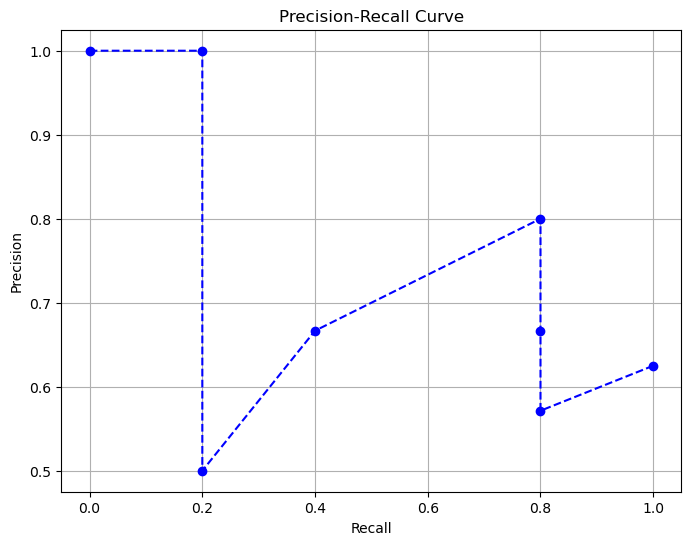

Optimal Threshold: 0.5


In [20]:
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, marker='o', linestyle='--', color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()

# Find the optimal threshold that maximizes the F1 score
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
optimal_threshold = thresholds[np.argmax(f1_scores)]
print("Optimal Threshold:", optimal_threshold)

In [23]:
from matcher.eval.eval import evaluate
import pandas as pd

df_Exact = pd.read_csv('../data/output_Exact.tsv',delimiter='\t',header=None, names=['PersonLabel','AliasLabel','Prediction','Score'])
df_Jaccard = pd.read_csv('../data/output_Jaccard.tsv',delimiter='\t',header=None, names=['PersonLabel','AliasLabel','Prediction','Score'])
df_Leven = pd.read_csv('../data/output_Leven.tsv',delimiter='\t',header=None, names=['PersonLabel','AliasLabel','Prediction','Score'])
df_tfidf = pd.read_csv('../data/output_tfidf.tsv',delimiter='\t',header=None, names=['PersonLabel','AliasLabel','Prediction','Score'])

0.0

In [36]:
accuracy = []

for i in thresholds:
    a = [1 if x > i else 0 for x in df_Leven.Score]
    b = len(df_Leven.Score)
    acc = sum(a)/b
    accuracy.append(acc)


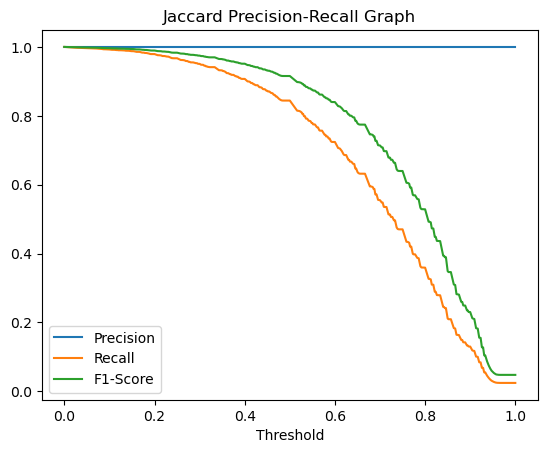

In [50]:
from sklearn.metrics import precision_recall_curve, f1_score
import numpy as np
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve([True] * len(df_Jaccard.Score), df_Jaccard.Score)
f1_scores = 2 * (precision * recall) / (precision + recall)

optimal_threshold = thresholds[np.argmax(f1_scores)]
optimal_threshold

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, f1_scores[:-1], label='F1-Score')
plt.xlabel('Threshold')
plt.legend()
plt.title('Jaccard Precision-Recall Graph')
plt.savefig('../images/Jaccard_Graph.png')
plt.show()

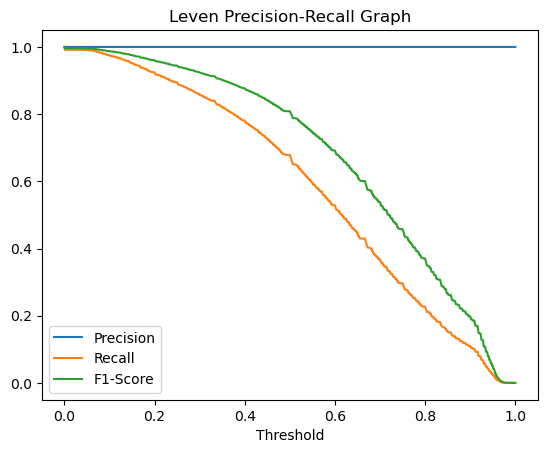

In [49]:
from sklearn.metrics import precision_recall_curve, f1_score
import numpy as np
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve([True] * len(df_Leven.Score), df_Leven.Score)
f1_scores = 2 * (precision * recall) / (precision + recall)

optimal_threshold = thresholds[np.argmax(f1_scores)]
optimal_threshold

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, f1_scores[:-1], label='F1-Score')
plt.xlabel('Threshold')
plt.legend()
plt.title('Leven Precision-Recall Graph')
plt.savefig('../images/Leven_Graph.png')
plt.show()

In [ ]:
import multiprocessing

In [ ]:
def my_function(arg):
    # Your code here

SyntaxError: incomplete input (1896142869.py, line 2)

In [ ]:
num_processes = multiprocessing.cpu_count()  # Use the number of CPU cores
pool = multiprocessing.Pool(processes=num_processes)

In [ ]:
input_data = [arg1, arg2, arg3, ...]  # List of input arguments
results = pool.map(my_function, input_data)

In [ ]:
pool.close()
pool.join()

In [ ]:
import multiprocessing

def square(x):
    return x * x

if __name__ == '__main__':
    data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

    # Create a pool of worker processes
    num_processes = multiprocessing.cpu_count()
    pool = multiprocessing.Pool(processes=num_processes)

    # Use the pool to parallelize the 'square' function
    results = pool.map(square, data)

    # Close and join the pool
    pool.close()
    pool.join()

    print(results)

In [6]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Example strings
string1 = "John Doe"
string2 = "Jaeho Doeng"

# Process the strings
doc1 = nlp(string1)
doc2 = nlp(string2)

# Calculate document vectors
vec1 = doc1.vector
vec2 = doc2.vector

# Calculate cosine similarity manually
def cosine_similarity(vec1, vec2):
    dot_product = sum(a * b for a, b in zip(vec1, vec2))
    magnitude1 = sum(a ** 2 for a in vec1) ** 0.5
    magnitude2 = sum(b ** 2 for b in vec2) ** 0.5
    similarity = dot_product / (magnitude1 * magnitude2)
    return similarity

similarity_score = cosine_similarity(vec1, vec2)
print("Similarity score:", similarity_score)


Similarity score: 0.6830147205537874


In [8]:
doc1.vector

array([-4.2457116e-01, -5.1015419e-01, -1.9615239e-01,  6.1065030e-01,
        8.0777824e-02, -1.8825516e-02, -6.0456097e-02,  1.1843672e+00,
        2.4415731e-01, -3.7129156e-02,  2.3059678e+00,  5.8923709e-01,
       -3.4078625e-01,  1.2316513e-01, -1.1349053e+00, -3.4910718e-01,
       -2.2721264e-01, -2.7167666e-01,  4.1193312e-01, -6.8638325e-02,
       -3.0019277e-01,  7.9361781e-02, -2.8475600e-01,  3.8703859e-02,
        7.5028241e-02,  1.0045658e+00,  1.1216756e+00,  2.1893129e-01,
       -6.8971872e-01,  1.4098338e+00, -4.4243482e-01, -4.4892266e-01,
        7.1432465e-01,  6.0206246e-01, -7.5819570e-01, -9.7218019e-01,
        7.7217489e-01,  2.7936715e-01,  6.8004131e-02, -9.5668417e-01,
       -1.2361677e+00,  4.6961039e-01, -9.1357851e-01,  2.0757923e-01,
       -3.5416868e-01, -7.5872600e-01, -5.8956075e-01,  3.4505212e-01,
        4.4266695e-01,  1.0861688e+00,  4.2243135e-01,  1.0160159e+00,
        8.2601798e-01, -6.0714382e-01, -2.5795186e-01, -4.8209947e-01,
      

In [55]:
pip install spacy


Note: you may need to restart the kernel to use updated packages.


In [1]:
python -m spacy download en_core_web_sm

SyntaxError: invalid syntax (581980377.py, line 1)

In [3]:
python -m spacy uninstall en_core_web_sm

SyntaxError: invalid syntax (1800150210.py, line 1)

In [9]:
import multiprocessing

def square(n):
    return n * n

if __name__ == "__main__":
    # Define the pool of processes
    with multiprocessing.Pool(processes=4) as pool:
        # Map the function to multiple inputs
        result = pool.map(square, [1, 2, 3, 4, 5])
    
    print(result)


In [1]:
import multiprocessing

def square(n):
    return n * n

if __name__ == "__main__":
    numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

    with multiprocessing.Pool() as pool:
        results = pool.map(square, numbers)

    print(results)


In [18]:
from matcher.utils.parse_tsv import TsvIterator
from matcher.eval.eval import evaluate
import multiprocessing

In [3]:
tsv_iterator = TsvIterator('../data/names.tsv','../data/testtest.tsv', 'Jaccard', 0.5)

In [5]:
chunk_size = len(list(tsv_iterator)) // 20
data_slices = [list(tsv_iterator)[i:i + chunk_size] for i in range(0, len(list(tsv_iterator)), chunk_size)]

ValueError: I/O operation on closed file.

In [6]:
len(list(tsv_iterator)) // 20

ValueError: I/O operation on closed file.

In [10]:
num_processes = 10

data_slices = []
for _ in range(num_processes):
    chunk = []
    try:
        for _ in range(100):
            chunk.append(next(tsv_iterator))
        data_slices.append(chunk)
    except StopIteration:
        break

ValueError: I/O operation on closed file.

In [9]:
len(tsv_iterator)

TypeError: object of type 'TsvIterator' has no len()

In [19]:

tsv_iterator = TsvIterator('../data/names.tsv','../data/testtest.tsv', 'Bonus', 0.5)

def multiprocess(variable):
    for i in variable:
        pass

# multiprocess(tsv_iterator)

In [20]:
for i in tsv_iterator:
    pass

NameError: name 'Bonus' is not defined